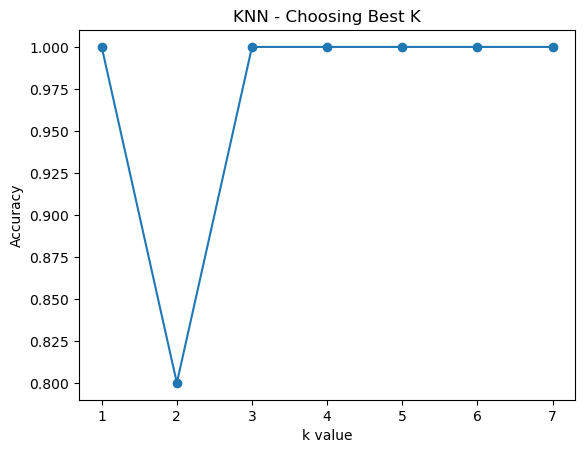

In [6]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset
dataset = pd.read_csv("knn_customers.csv")

x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state=0)

#Scaling important even for 0/1 values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# k tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_list = []
k_values = range(1, 8)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))

# plot
plt.plot(k_values, accuracy_list, marker = 'o')
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("KNN - Choosing Best K")
plt.show()

In [2]:
best_k = k_values[np.argmax(accuracy_list)]
print("Best K:", best_k)

Best K: 1


In [3]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(x_train, y_train)

y_pred = knn_final.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

   Actual  Predicted
0       0          0
1       1          1
2       0          0
3       1          1
4       0          0


In [4]:
import joblib

joblib.dump(knn_final, "knn_customer_model.pkl")
joblib.dump(sc, "scaler.pkl")

print("KNN model and scaler saved successfully!")



KNN model and scaler saved successfully!
